### bmp图像滤波

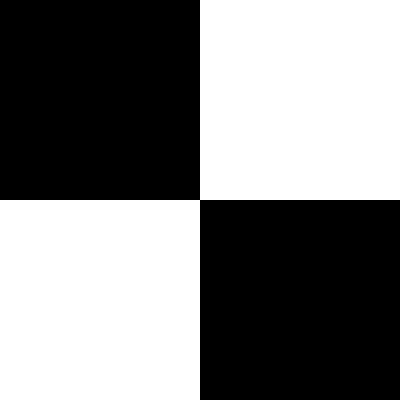

In [48]:
# 读取图像
from PIL import Image

# 读取bmp图像
img = Image.open('./pic_2.bmp')
# 显示图像
img

In [49]:
# 获取图像尺寸
width, height = img.size

# 显示图像尺寸
print("图像尺寸为：{} x {}".format(width, height))

图像尺寸为：400 x 400


In [50]:
# 获取图像像素矩阵
pixels = img.load()
# 显示像素矩阵
print(pixels[3,3])
print(pixels[399,399][0])
print(pixels[399,0][0])

(0, 0, 0)
0
255


In [51]:
import numpy as np

In [52]:
# 存储成numpy形式
image = np.empty((width, height))
for x in range(img.width):
    for y in range(img.height):
        image[y,x] = pixels[x,y][0]
image

array([[  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.]])

In [53]:
image.shape

(400, 400)

#### 卷积核定义

In [63]:
# 定义卷积核
kernel = np.full((15, 15), 1/225)
kernel.shape

(15, 15)

#### 矩阵填充

In [64]:
# 假设原始矩阵为mat，p为行填充数，q为列填充数
p = 7
q = 7

# 在原始矩阵的上下和左右分别填充0
zero_fill_image = np.pad(image, ((p, p), (q, q)), 'constant', constant_values=0)
one_fill_image = np.pad(image, ((p, p), (q, q)), 'constant', constant_values=255)
copy_fill_image = np.pad(image, ((p, p), (q, q)), 'edge')
zero_fill_image

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (4,2)  and requested shape (2,2)

In [56]:
copy_fill_image = np.pad(image, ((p, p), (q, q)), 'constant', constant_values=255)
for i in range(kernel.shape[0]):
    for j in range(copy_fill_image.shape[0]/2):
        
# copy_fill_image[0][0]
# copy_fill_image.shape[0]

SyntaxError: invalid syntax (1005015584.py, line 2)

In [57]:
zero_fill_image.shape

(414, 414)

In [58]:
# 定义卷积函数
def convolution(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        # 表示卷积操作的次数
        y = y - m + 1
        x = x - n + 1
        #创建一个新图像空间
        new_image = np.zeros((y,x))
        #开始卷积
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

# 执行卷积操作
zero_fill_image = convolution(zero_fill_image, kernel)
one_fill_image = convolution(one_fill_image,kernel)

# 输出卷积结果
print(zero_fill_image)

[[  0.           0.           0.         ...  90.66666667  81.6
   72.53333333]
 [  0.           0.           0.         ... 102.          91.8
   81.6       ]
 [  0.           0.           0.         ... 113.33333333 102.
   90.66666667]
 ...
 [ 90.66666667 102.         113.33333333 ...   0.           0.
    0.        ]
 [ 81.6         91.8        102.         ...   0.           0.
    0.        ]
 [ 72.53333333  81.6         90.66666667 ...   0.           0.
    0.        ]]


In [59]:
zero_fill_image.shape

(400, 400)

In [60]:
import matplotlib.pyplot as plt

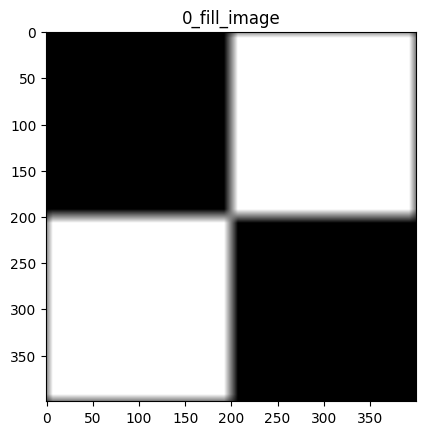

In [61]:
# 使用imshow()函数将矩阵显示为图像
plt.imshow(zero_fill_image, cmap='gray')

plt.title('0_fill_image')

# 显示图像
plt.show()

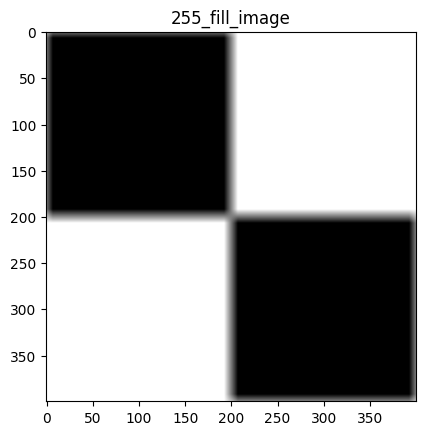

In [62]:
# 使用imshow()函数将矩阵显示为图像
plt.imshow(one_fill_image, cmap='gray')

plt.title('255_fill_image')

# 显示图像
plt.show()